## 取得單月股票資料

In [2]:
import pandas as pd

url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY'\
      '?response=html&date=20210101&stockNo=2317'
df = pd.read_html(url, header=1)[0]
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/01/04,233726746,22587972258,93.4,100.0,93.3,99.9,7.9,115789
1,110/01/05,234178116,24176652664,101.0,105.0,101.0,104.0,4.1,114366
2,110/01/06,222119287,23465513766,107.5,109.0,102.0,105.0,1.0,114160
3,110/01/07,114653734,12242829524,108.0,108.0,105.5,107.0,2.0,59013
4,110/01/08,115547259,12431474200,109.0,109.5,106.0,108.0,1.0,61278
5,110/01/11,70525408,7582606654,108.0,109.0,106.5,107.5,-0.5,39544
6,110/01/12,106622057,11119079660,106.5,107.0,103.0,104.0,-3.5,56730
7,110/01/13,83561136,8856217204,105.0,107.0,105.0,106.5,2.5,40226
8,110/01/14,321271715,36391347707,109.0,117.0,108.0,116.0,9.5,141468
9,110/01/15,171273151,19817867014,118.0,119.0,113.0,115.5,-0.5,86061


## 自訂日期格式轉換函式

In [1]:
def convertDate(date):  #轉換民國日期為西元
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

print(convertDate('110/05/02'))

20210502


## 全年個股單月網址

In [3]:
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr
  
urlbase = 'http://www.twse.com.tw/exchangeReport/STOCK_DAY?'\
  'response=html&date=2021'  #網址前半
urltail = '01&stockNo=2317&_=1521363562193'  #網址後半
for i in range(1, 13):  #取1到12數字
    url_twse = urlbase + twodigit(i) + urltail  #組合網址
    print(url_twse)

http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210101&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210201&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210301&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210401&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210501&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210601&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210701&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210801&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210901&stockNo=2317&_=1521363562193
http://www.twse.com.tw/exchangeReport/STOCK_DAY?respons

## 結合月份資料

In [4]:
import pandas as pd

url01 = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY' \
        '?response=html&date=20210101&stockNo=2317'
url02 = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY' \
        '?response=html&date=20210201&stockNo=2317'
df1 = pd.read_html(url01, header=1)[0]
df2 = pd.read_html(url02, header=1)[0]
df = pd.concat([df1, df2], ignore_index=True)
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/01/04,233726746,22587972258,93.4,100.0,93.3,99.9,7.9,115789
1,110/01/05,234178116,24176652664,101.0,105.0,101.0,104.0,4.1,114366
2,110/01/06,222119287,23465513766,107.5,109.0,102.0,105.0,1.0,114160
3,110/01/07,114653734,12242829524,108.0,108.0,105.5,107.0,2.0,59013
4,110/01/08,115547259,12431474200,109.0,109.5,106.0,108.0,1.0,61278
5,110/01/11,70525408,7582606654,108.0,109.0,106.5,107.5,-0.5,39544
6,110/01/12,106622057,11119079660,106.5,107.0,103.0,104.0,-3.5,56730
7,110/01/13,83561136,8856217204,105.0,107.0,105.0,106.5,2.5,40226
8,110/01/14,321271715,36391347707,109.0,117.0,108.0,116.0,9.5,141468
9,110/01/15,171273151,19817867014,118.0,119.0,113.0,115.5,-0.5,86061


## 單月個股統計圖

In [5]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2022-08-30 01:33:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.194.102, 173.194.194.101, 173.194.194.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sgdq8fcpp51k5qd1n3unvr9prud22cf3/1661823150000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=45978d71-cff2-4ed8-ad67-6bc165de4ae6 [following]
--2022-08-30 01:33:11--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sgdq8fcpp51k5qd1n3unvr9prud22cf3/1661823150000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=45978d71-cff2-4ed8-ad67-6bc165de4ae6
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.136.132, 2607:f8b0:4001:c34::84
Connecting to d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


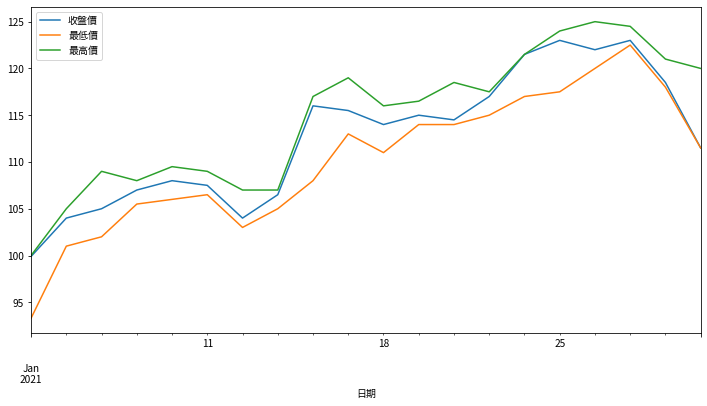

In [6]:
def convertDate(date):  #轉換民國日期為西元
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf') #設定中文字型
matplotlib.rc('font', family='Taipei Sans TC Beta')
filepath = 'stockmonth01.csv'
if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
  url = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=20210101&stockNo=2317'
  df = pd.read_html(url, header=1)[0]
  df.to_csv(filepath, encoding='utf-8', index=False)

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x='日期', y=['收盤價', '最低價', '最高價'])  #繪製統計圖

## 全年個股統計圖

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


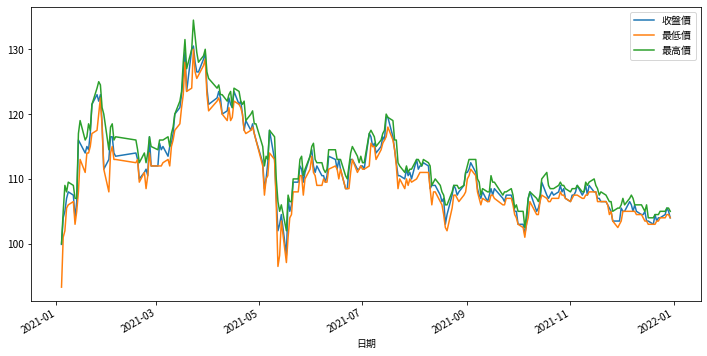

In [8]:
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr

def convertDate(date):  #轉換民國日期為西元
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import csv
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf') #設定中文字型
matplotlib.rc('font', family='Taipei Sans TC Beta')
urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=2021'  #網址前半
urltail = '01&stockNo=2317'  #網址後半
filepath = 'stockyear2021.csv'

dfall = pd.DataFrame() # 新增空的DataFrame
if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
    for i in range(1, 13):  #取1到12數字
        url_twse = urlbase + twodigit(i) + urltail  #組合網址
        dftemp = pd.read_html(url_twse, header=1)[0]
        dfall = pd.concat([dfall, dftemp], ignore_index=True)
        time.sleep(2)
    dfall.to_csv(filepath, encoding='utf-8', index=False)

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格式
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式
pdstock.plot(kind='line', figsize=(12, 6), x='日期', y=['收盤價', '最低價', '最高價'])  #繪製統計圖

## 以 plotly 繪製全年個股統計圖

In [10]:
def twodigit(n):  #將數值轉為二位數字串
    if(n < 10):
        retstr = '0' + str(n)
    else:
        retstr = str(n)
    return retstr

def convertDate(date):  #轉換民國日期為西元
    str1 = str(date)
    yearstr = str1[:3]  #取出民國年
    realyear = str(int(yearstr) + 1911)  #轉為西元年
    realdate = realyear + str1[4:6] + str1[7:9]  #組合日期
    return realdate

import requests
import csv
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager
import plotly.graph_objects as go

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf') #設定中文字型
matplotlib.rc('font', family='Taipei Sans TC Beta')
urlbase = 'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=html&date=2021'  #網址前半
urltail = '01&stockNo=2317'  #網址後半
filepath = 'stockyear2021.csv'

dfall = pd.DataFrame() # 新增空的DataFrame
if not os.path.isfile(filepath):  #如果檔案不存在就建立檔案
    for i in range(1, 13):  #取1到12數字
        url_twse = urlbase + twodigit(i) + urltail  #組合網址
        dftemp = pd.read_html(url_twse, header=1)[0]
        dfall = pd.concat([dfall, dftemp], ignore_index=True)
        time.sleep(2)
    dfall.to_csv(filepath, encoding='utf-8', index=False)

pdstock = pd.read_csv(filepath, encoding='utf-8')  #以pandas讀取檔案
for i in range(len(pdstock['日期'])):  #轉換日期式為西元年格式
    pdstock['日期'][i] = convertDate(pdstock['日期'][i])
pdstock['日期'] = pd.to_datetime(pdstock['日期'])  #轉換日期欄位為日期格式

f = go.Figure()
f.add_trace(go.Scatter(x=pdstock['日期'], y=pdstock['收盤價'], name='收盤價'))
f.add_trace(go.Scatter(x=pdstock['日期'], y=pdstock['最低價'], name='最低價'))
f.add_trace(go.Scatter(x=pdstock['日期'], y=pdstock['最高價'], name='最高價'))
f.update_layout(title='2021年個股統計圖', showlegend=True)
f.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

